<ipython-input-1-00e7ac253ea5>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
<ipython-input-1-00e7ac253ea5>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-1-00e7ac253ea5>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


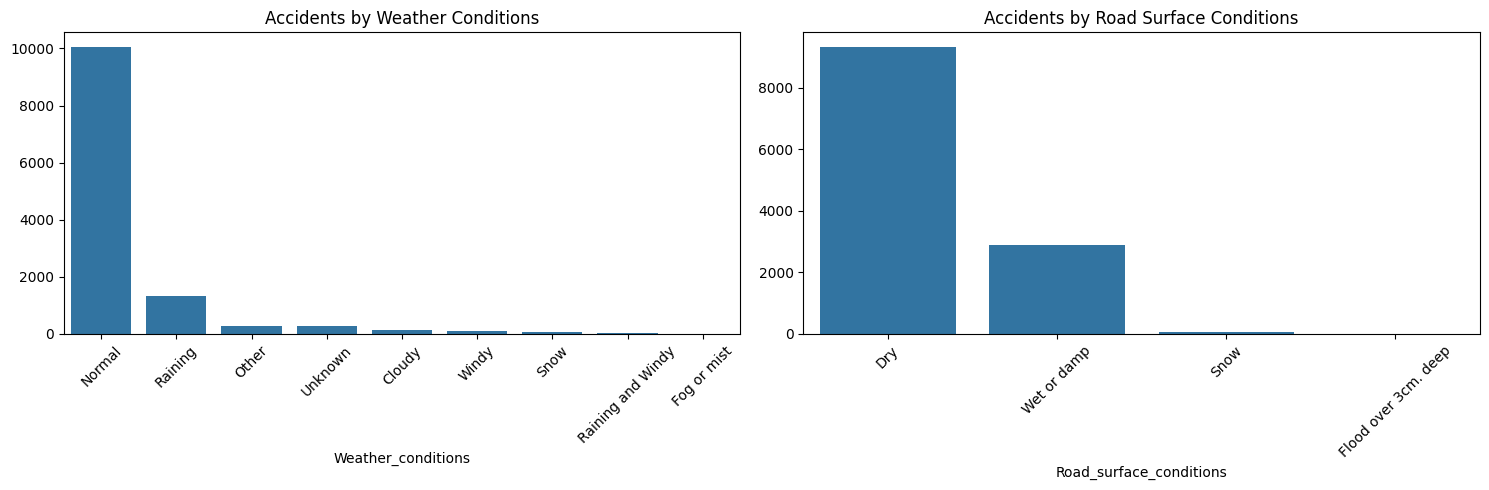

<ipython-input-1-00e7ac253ea5>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_summary.index, y=hourly_summary.values, palette="viridis")


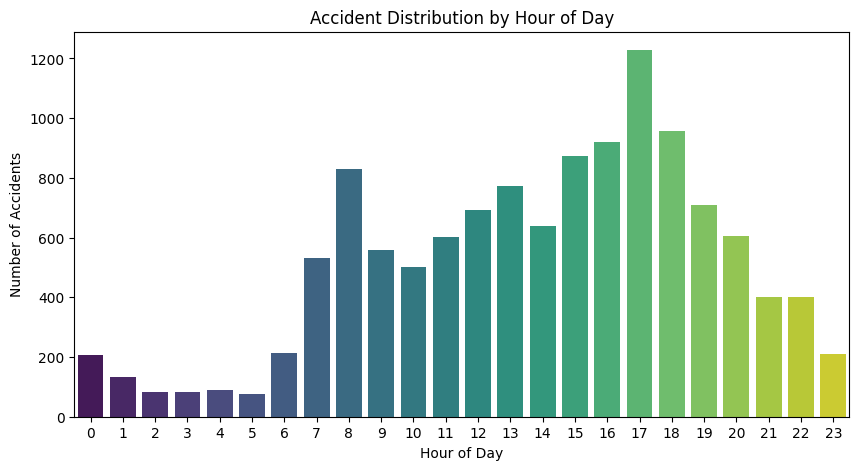

<ipython-input-1-00e7ac253ea5>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_summary.index, y=area_summary.values, palette="coolwarm")


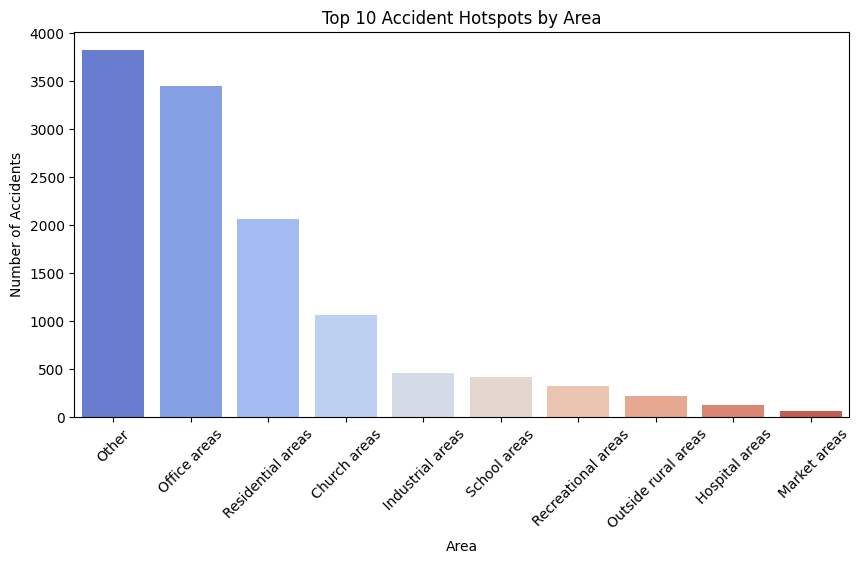

<ipython-input-1-00e7ac253ea5>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_summary.index, y=cause_summary.values, palette="muted")


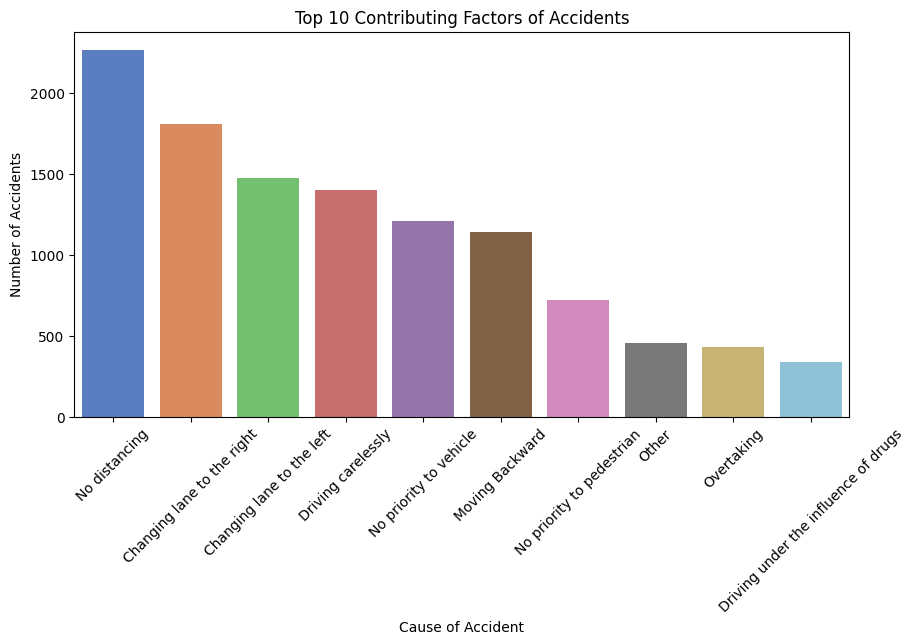

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

zip_path = 'RTA Dataset.csv.zip'
with zipfile.ZipFile(zip_path, 'r') as z:
    csv_file = z.namelist()[0]
    with z.open(csv_file) as file:
        df = pd.read_csv(file)

df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

weather_summary = df['Weather_conditions'].value_counts()
road_conditions_summary = df['Road_surface_conditions'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=weather_summary.index, y=weather_summary.values, ax=axes[0])
axes[0].set_title("Accidents by Weather Conditions")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(x=road_conditions_summary.index, y=road_conditions_summary.values, ax=axes[1])
axes[1].set_title("Accidents by Road Surface Conditions")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

hourly_summary = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_summary.index, y=hourly_summary.values, palette="viridis")
plt.title("Accident Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 24))
pl
area_summary = df['Area_accident_occured'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=area_summary.index, y=area_summary.values, palette="coolwarm")
plt.title("Top 10 Accident Hotspots by Area")
plt.xticks(rotation=45)
plt.xlabel("Area")
plt.ylabel("Number of Accidents")
plt.show()

cause_summary = df['Cause_of_accident'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=cause_summary.index, y=cause_summary.values, palette="muted")
plt.title("Top 10 Contributing Factors of Accidents")
plt.xticks(rotation=45)
plt.xlabel("Cause of Accident")
plt.ylabel("Number of Accidents")
plt.show()
